In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python utilizada neste Notebook: ', python_version())

Versão da Linguagem Python utilizada neste Notebook:  3.9.12


In [2]:
# Imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Versões dos pacotes utilizados (imports)

%reload_ext watermark
%watermark -a "Sandro Luiz Mazzolla Junior - TCC" --iversions

Author: Sandro Luiz Mazzolla Junior - TCC

seaborn   : 0.11.2
numpy     : 1.21.5
scipy     : 1.7.3
matplotlib: 3.5.1
pandas    : 1.4.2



## Carregando o DataSet

In [4]:
df = pd.read_csv('dados/dataset.csv')

In [5]:
# Formato do Dataset em linhas , colunas
df.shape

(11000, 12)

In [6]:
# Informações sobre colunas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
# Lista de colunas categóricas
categoricas = ['corredor_armazem',
               'modo_envio',
               'prioridade_produto',
               'genero']

In [8]:
# Lista de colunas numéricas
numericas = ['numero_chamadas_cliente',
             'avaliacao_cliente',
             'custo_produto',
             'compras_anteriores',
             'desconto',
             'peso_gramas']

# ID não possui nenhuma informação útil

In [9]:
# Variável alvo, estudo será feito com base nesta variável
target = ['entregue_no_prazo']

In [10]:
# Resumo das Variáveis Numéricas
df[numericas].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [11]:
# Resumo das variáveis categóricas
df[categoricas].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [12]:
# Contando valores únicos (cada categoria) da variável alvo

# 1 classe positiva, entrega dentro do prazo
# 0 classe negativa, entrega fora do prazo
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

## Limpeza de Dados

### Tratamento de Valores Duplicados

**ATENÇÃO**: Valor ausente significa ausência de informação e não ausência de dado!

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-Processamento podem gerar valores ausentes, o que precisa ser tratado.

In [13]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [14]:
# Verificando se há valores ausentes

df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro, incluindo o ID).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [15]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [16]:
# Verificando se há valores duplicados

df.duplicated().sum()

0

### Tratamento de Valores Outliers

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. 

In [17]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [18]:
df[numericas].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [19]:
# Cálculo da média de 'desconto'

df.desconto.mean()

13.372545454545454

In [20]:
# Desvio padrão de 'desconto'

df.desconto.std()

16.20494287359407

<AxesSubplot:>

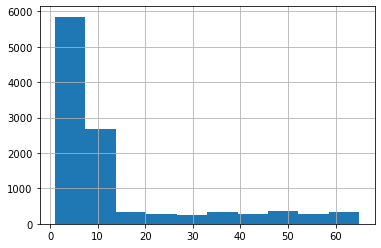

In [21]:
# Histograma de 'desconto'

df.desconto.hist()

Observando o gráfico, podemos dizer que a maioria dos produtos sofreram um desconto menor que a média, e também valores bem acima da média.

In [22]:
# Calculando os limites superior e inferior
# Um valor outlier é aquele que está abaixo ou acima do limite.

limiteSuperior = df.desconto.mean() + 3 * df.desconto.std()
print('Limite superior: ', limiteSuperior)

limiteInferior = df.desconto.mean() - 3 * df.desconto.std()
print('Limite inferior: ', limiteInferior)

Limite superior:  61.987374075327665
Limite inferior:  -35.24228316623676


Normalmente, segundo estatística, um outlier está 3 vezes acima ou abaixo do desvio padrão.

https://portaldatascience.com/outlier/

In [23]:
# Extaindo registros com outliers da coluna 'desconto'

df_outlier_desconto = df[(df.desconto <= limiteInferior) | (df.desconto >= limiteSuperior)]
df_outlier_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [24]:
# Filtrando o dataframe removendo os registros com outliers
df = df[(df.desconto > limiteInferior) & (df.desconto < limiteSuperior)]

In [25]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 10819


In [26]:
# Criando um array numpy de registros do tamanha do df (10819)

registros = np.array([True] * len(df))

In [27]:
type(registros)

numpy.ndarray

In [28]:
# Calculando os valores de True no array

np.count_nonzero(registros == True)

10819

In [29]:
# Calculando os valores de True no array

np.count_nonzero(registros == False)

0

O array de True é criado, para filtrar os valores outliers, caso um valor seja encontrado, a informação é transformada em False, facilitando assim a filtragem dos registros.

In [30]:
# Lista de colunas numéricas, sem a coluna 'desconto'
numericas2 = ['numero_chamadas_cliente',
             'avaliacao_cliente',
             'custo_produto',
             'compras_anteriores',
             'peso_gramas']

In [31]:
# Loop em cada variável númerica, para filtragem dos registros
for col in numericas2:
    
    # Calculando o z-score absoluto (pois não faz sentido buscar por valores negativos na variável)
    # Stats deriva do pacote stats, da importação scipy [2]
    zscore = abs(stats.zscore(df[col]))
    
    # Mantém os valores com menos de 3 z-scores absoluto
    registros = (zscore < 3) & registros

Z-scores são o número de desvios padrão acima e abaixo da média. Por exemplo, um
escore Z de 2 indica que uma observação está dois desvios padrão acima da média, enquanto um
escore Z de -2 significa que está dois desvios padrão abaixo da média. Um Z-score de zero
representa um valor que é igual à média.

Quanto mais longe o Z-score de uma observação estiver de zero, mais incomum essa
observação será. Um valor de corte padrão para encontrar valores discrepantes são escores Z de
+/- 3 ou acima. 


In [32]:
np.count_nonzero(registros == True)

10643

In [33]:
np.count_nonzero(registros == False)

176

Valores 'False' são valores outliers

In [34]:
# Removendo registros com z-score abaixo de 3 nas colunas numéricas
df = df[registros]

In [35]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


### Tratamento de Desbalanceamento de Classe

Deve ser feito nos dados de treino, após o pré-processamento dos dados.

In [36]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [37]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

Existe uma diferença entre valores de classe 1 e 0, caso esse valor for muito longe um do outros, é necessário balancear a classe.